# Singular Value Decomposition (SVD)

Now we will explore Singular Value Decomposition (SVD), a powerful matrix factorization technique widely used for dimensionality reduction, noise reduction, and data compression in machine learning and image processing. SVD decomposes a matrix into three components: left singular vectors, singular values, and right singular vectors, revealing important structure in the data.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
#load the dataset of mall
df= pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


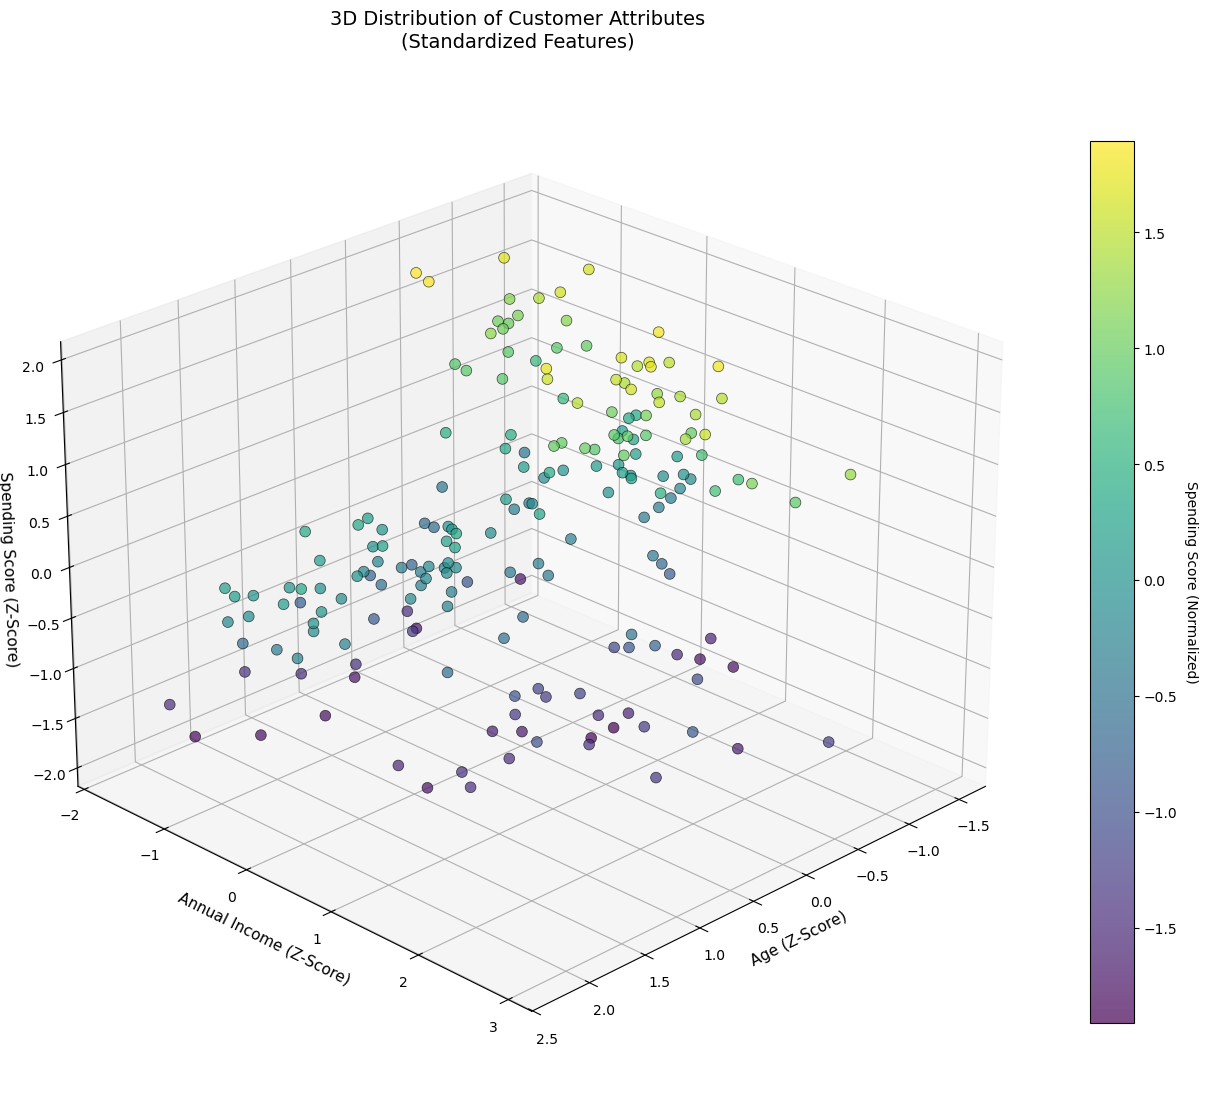

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D projection

# Load the dataset (assuming 'df' is a pandas DataFrame)
# Select relevant features for clustering analysis
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Standardize the features to have zero mean and unit variance
# This is CRITICAL for distance-based algorithms like SVD/PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Returns a NumPy array

# ================================================
# 3D Visualization of Original Scaled Data
# ================================================
fig = plt.figure(figsize=(13, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with enhanced aesthetics
scatter = ax.scatter(
    X_scaled[:, 0],  # Age
    X_scaled[:, 1],  # Annual Income
    X_scaled[:, 2],  # Spending Score
    c=X_scaled[:, 2],  # Color by Spending Score for better interpretation
    cmap='viridis',
    s=60,
    alpha=0.7,
    edgecolor='k',
    linewidth=0.5
)

# Add colorbar for Spending Score
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Spending Score (Normalized)', rotation=270, labelpad=15)

# Labels and title with improved formatting
ax.set_title(
    "3D Distribution of Customer Attributes\n(Standardized Features)",
    fontsize=14,
    pad=20
)
ax.set_xlabel("Age (Z-Score)", fontsize=11)
ax.set_ylabel("Annual Income (Z-Score)", fontsize=11)
ax.set_zlabel("Spending Score (Z-Score)", fontsize=11)
ax.grid(True, linestyle='--', alpha=0.5)
ax.view_init(elev=25, azim=45)  # Adjust viewing angle for clarity

plt.tight_layout()
plt.show()

# Now selecting optimal number components with elbow method 

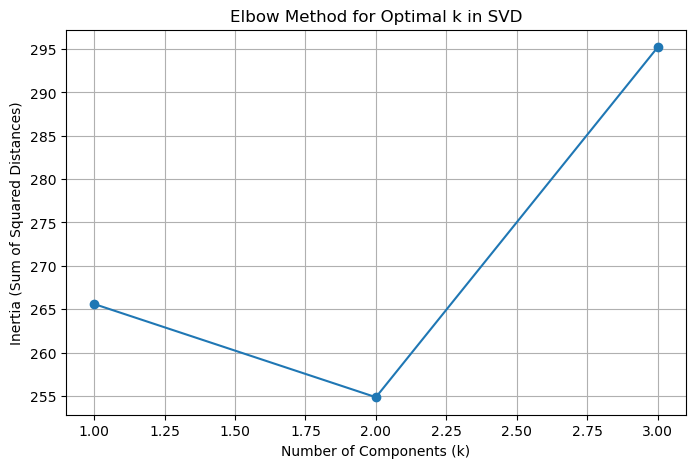

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
import numpy as np

import matplotlib.pyplot as plt

# Use the standardized data for SVD (already available as X_scaled)
inertia = []
# Use the standardized data for SVD (already available as X_scaled in cell 4)
# n_features = 3, so n_components must be <= 3
k_range = range(1, 4)

for k in k_range:
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_reduced = svd.fit_transform(X_scaled)
    if k == 1:
        centers = np.mean(X_reduced, axis=0, keepdims=True)
        labels = np.zeros(X_reduced.shape[0], dtype=int)
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_reduced)
        centers = kmeans.cluster_centers_
    _, dists = pairwise_distances_argmin_min(X_reduced, centers)
    inertia.append((dists ** 2).sum())

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k in SVD')
plt.grid(True)
plt.show()

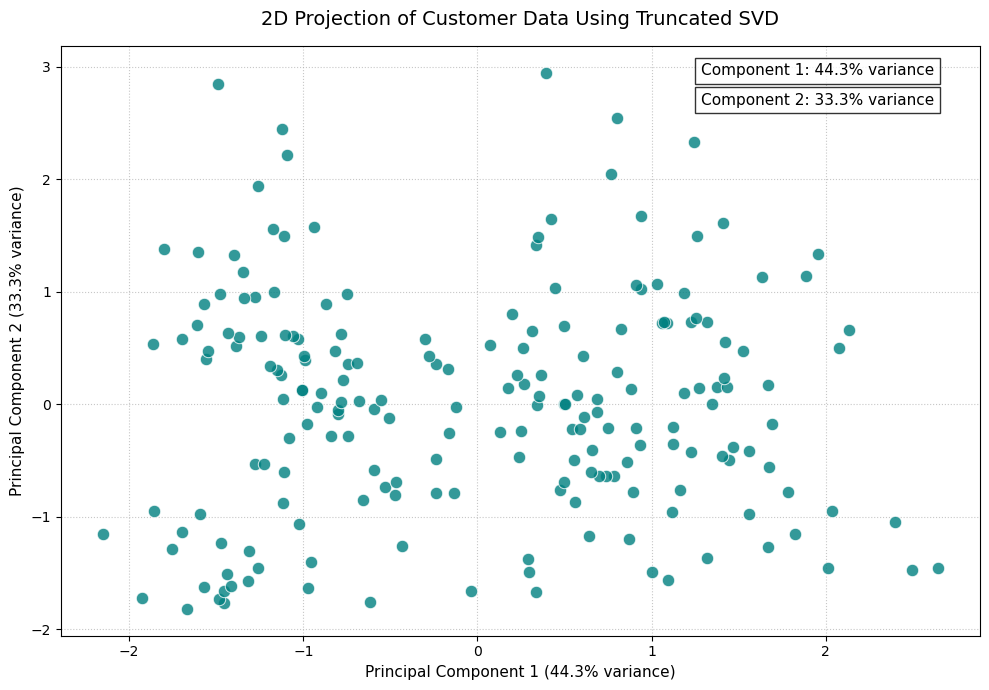


=== Dimensionality Reduction Performance ===
Explained variance per component: [0.44266167 0.33308378]
Total variance captured: 77.57%

Good variance retention for 2D visualization.


In [7]:
# ================================================
# Dimensionality Reduction with Truncated SVD
# ================================================
# TruncatedSVD is preferred over PCA for sparse data or when working with sklearn's pipelines
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_scaled)  # Project to 2D

# ================================================
# 2D Visualization After Dimensionality Reduction
# ================================================
plt.figure(figsize=(10, 7))

# Scatter plot with cluster-friendly colors
plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c='teal',
    s=80,
    alpha=0.8,
    edgecolor='w',
    linewidth=0.7
)

# Annotate explained variance on the plot
for i, var in enumerate(svd.explained_variance_ratio_):
    plt.text(
        0.95,
        0.95 - (i * 0.05),
        f"Component {i+1}: {var:.1%} variance",
        transform=plt.gca().transAxes,
        ha='right',
        fontsize=11,
        bbox=dict(facecolor='white', alpha=0.8)
    )

# Professional formatting
plt.title(
    "2D Projection of Customer Data Using Truncated SVD",
    fontsize=14,
    pad=15
)
plt.xlabel(
    f"Principal Component 1 ({svd.explained_variance_ratio_[0]:.1%} variance)",
    fontsize=11
)
plt.ylabel(
    f"Principal Component 2 ({svd.explained_variance_ratio_[1]:.1%} variance)",
    fontsize=11
)
plt.grid(True, linestyle=':', alpha=0.7)
plt.gca().set_axisbelow(True)  # Grid lines behind data points

plt.tight_layout()
plt.show()

# ================================================
# Explained Variance Analysis
# ================================================
print("\n=== Dimensionality Reduction Performance ===")
print(f"Explained variance per component: {svd.explained_variance_ratio_}")
print(f"Total variance captured: {svd.explained_variance_ratio_.sum():.2%}")

# Rule of thumb: Aim for at least 70-80% variance retention
if svd.explained_variance_ratio_.sum() < 0.7:
    print("\nWarning: Consider increasing n_components to capture more variance.")
else:
    print("\nGood variance retention for 2D visualization.")

#
<h2 style="color:#2E86C1; background-color:#F9E79F; padding:12px; border-radius:8px; text-align:center;">
    Another Example of SVD with cat Images: <span style="color:#117A65;">Dimensionality Reduction</span>
</h2>

[[ 3  3  2]
 [ 2  3 -2]]
U:  [[-0.7815437 -0.6238505]
 [-0.6238505  0.7815437]]
Singular array [5.54801894 2.86696457]
V^{T} [[-0.64749817 -0.7599438  -0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]
[[ 0.11462451  0.04347826]
 [ 0.07114625  0.13043478]
 [ 0.22134387 -0.26086957]]


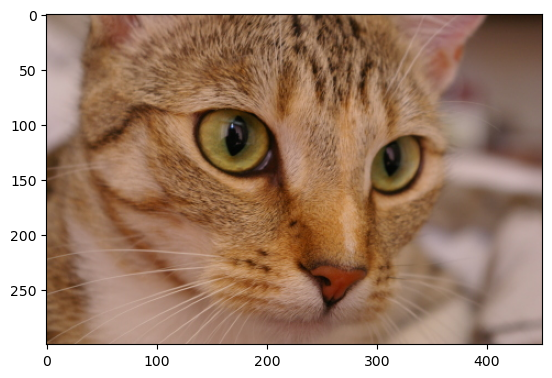

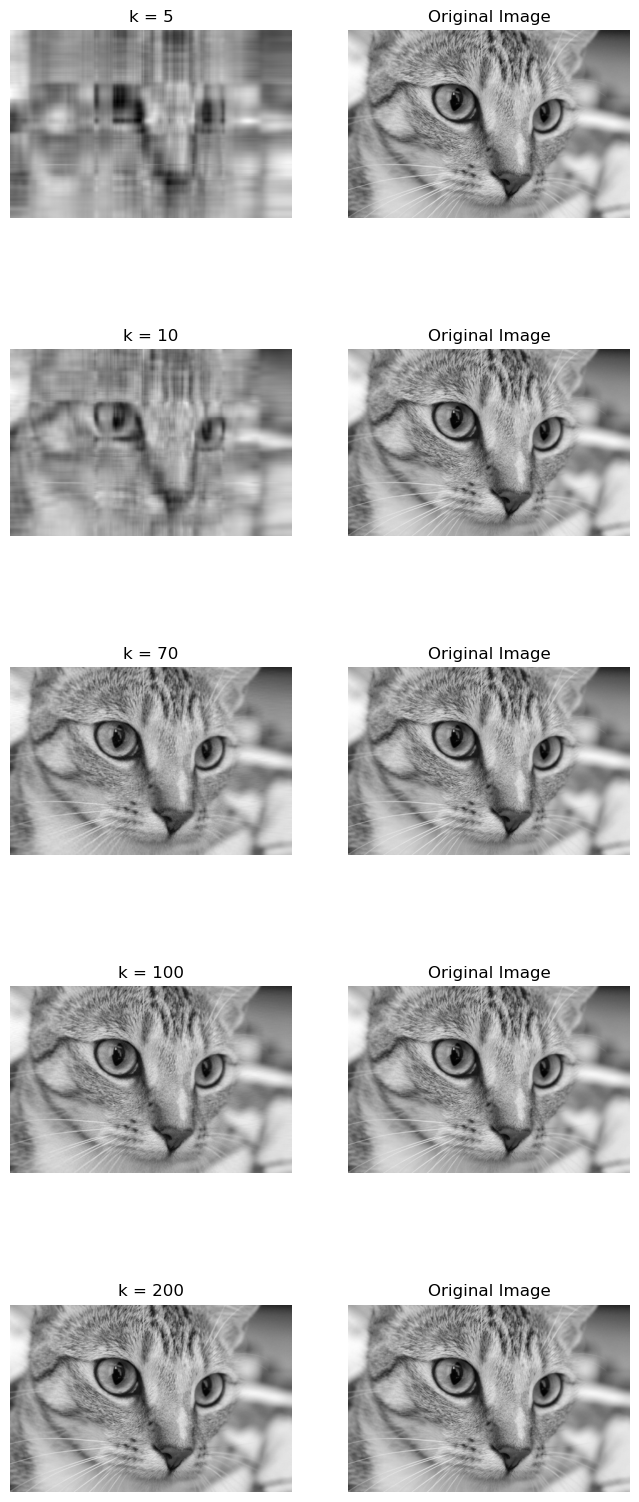

In [8]:
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd


X = np.array([[3, 3, 2], [2, 3, -2]])
print(X)

U, singular, V_transpose = svd(X)

print("U: ", U)
print("Singular array", singular)
print("V^{T}", V_transpose)

singular_inv = 1.0 / singular
s_inv = np.zeros(X.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]
M = np.dot(np.dot(V_transpose.T, s_inv.T), U.T)
print(M)

# SVD on cat Image

cat = data.chelsea()
plt.imshow(cat)

gray_cat = rgb2gray(cat)

U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(5, 2, figsize=(8, 20))

curr_fig = 0
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()